# Temp

In [2]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

In [3]:
%run ../../stochastic_fractal_m.py

In [4]:
alphap = 3
probp = 0.75

In [10]:
ensemble_size = 1000*10
time_iteration = 1000*100
min_iteration = 1000*10

# number_of_points = 21

iteration_step = 1000*5

## Directories

In [11]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")
    pass

### Filename
filename = "fractal_dim_alpha_{}_p_{}".format(alphap, int(probp*100))
out_data_filename = dir_data +filename
print(out_data_filename)

directory  ../../data/temp/alpha3/  exists
directory  ../../figures/temp/alpha3/  exists
../../data/temp/alpha3/fractal_dim_alpha_3_p_75


In [12]:
sf_numberlength = NumberLengthTemp(alpha=alphap, probability=probp)
sf_numberlength.log(True)

kwargs  {'alpha': 3, 'probability': 0.75}


In [13]:
sf_numberlength.run(time_iteration, min_iteration, iteration_step)

array([[ 9.        ,  0.92525783],
       [10.        ,  0.92525783],
       [12.        ,  0.92525783],
       [13.        ,  0.92525783],
       [13.        ,  0.84439731],
       [13.        ,  0.84439731],
       [14.        ,  0.84439731],
       [14.        ,  0.84439731],
       [14.        ,  0.84439731],
       [14.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [15.        ,  0.84439731],
       [16.        ,  0.84439731],
       [16.        ,  0.84439731]])

In [14]:
data = sf_numberlength.run_ensemble(ensemble_size, time_iteration, min_iteration, iteration_step)

realization  100  . Time spent  10.01322078704834  sec
realization  200  . Time spent  9.534574031829834  sec
realization  300  . Time spent  9.720960855484009  sec
realization  400  . Time spent  9.643064022064209  sec
realization  500  . Time spent  9.747058629989624  sec
realization  600  . Time spent  9.491653442382812  sec
realization  700  . Time spent  9.661409854888916  sec
realization  800  . Time spent  9.668137550354004  sec
realization  900  . Time spent  9.610830068588257  sec
realization  1000  . Time spent  9.599377393722534  sec
realization  1100  . Time spent  9.62684679031372  sec
realization  1200  . Time spent  9.619350910186768  sec
realization  1300  . Time spent  9.601986169815063  sec
realization  1400  . Time spent  9.565137386322021  sec
realization  1500  . Time spent  9.587846040725708  sec
realization  1600  . Time spent  9.655912399291992  sec
realization  1700  . Time spent  9.430147886276245  sec
realization  1800  . Time spent  9.50912356376648  sec
rea

estimated df(alpha, p)=  0.7900149636258732


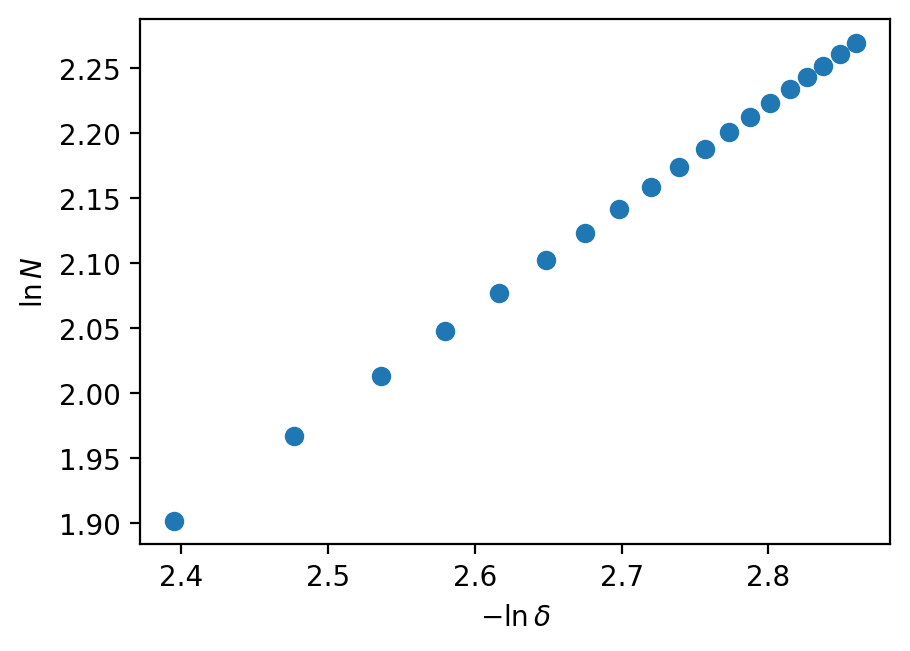

In [15]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 200)
N1_average, M1_average = data.T
N1_log = np.log(N1_average)
minus_delta1_log = N1_log - np.log(M1_average)
slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
print("estimated df(alpha, p)= ", slope)
plt.plot(minus_delta1_log, N1_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")
axes.set_position([0.15,0.15,0.75,0.75])

In [19]:
print("estimated   df = ", slope)
ana_soln = AnalyticSoln()
print("Theoritical df =", ana_soln.find_df(alphap, probp))

estimated   df =  0.7900149636258732
Theoritical df = 0.788345


0.20138325344575836


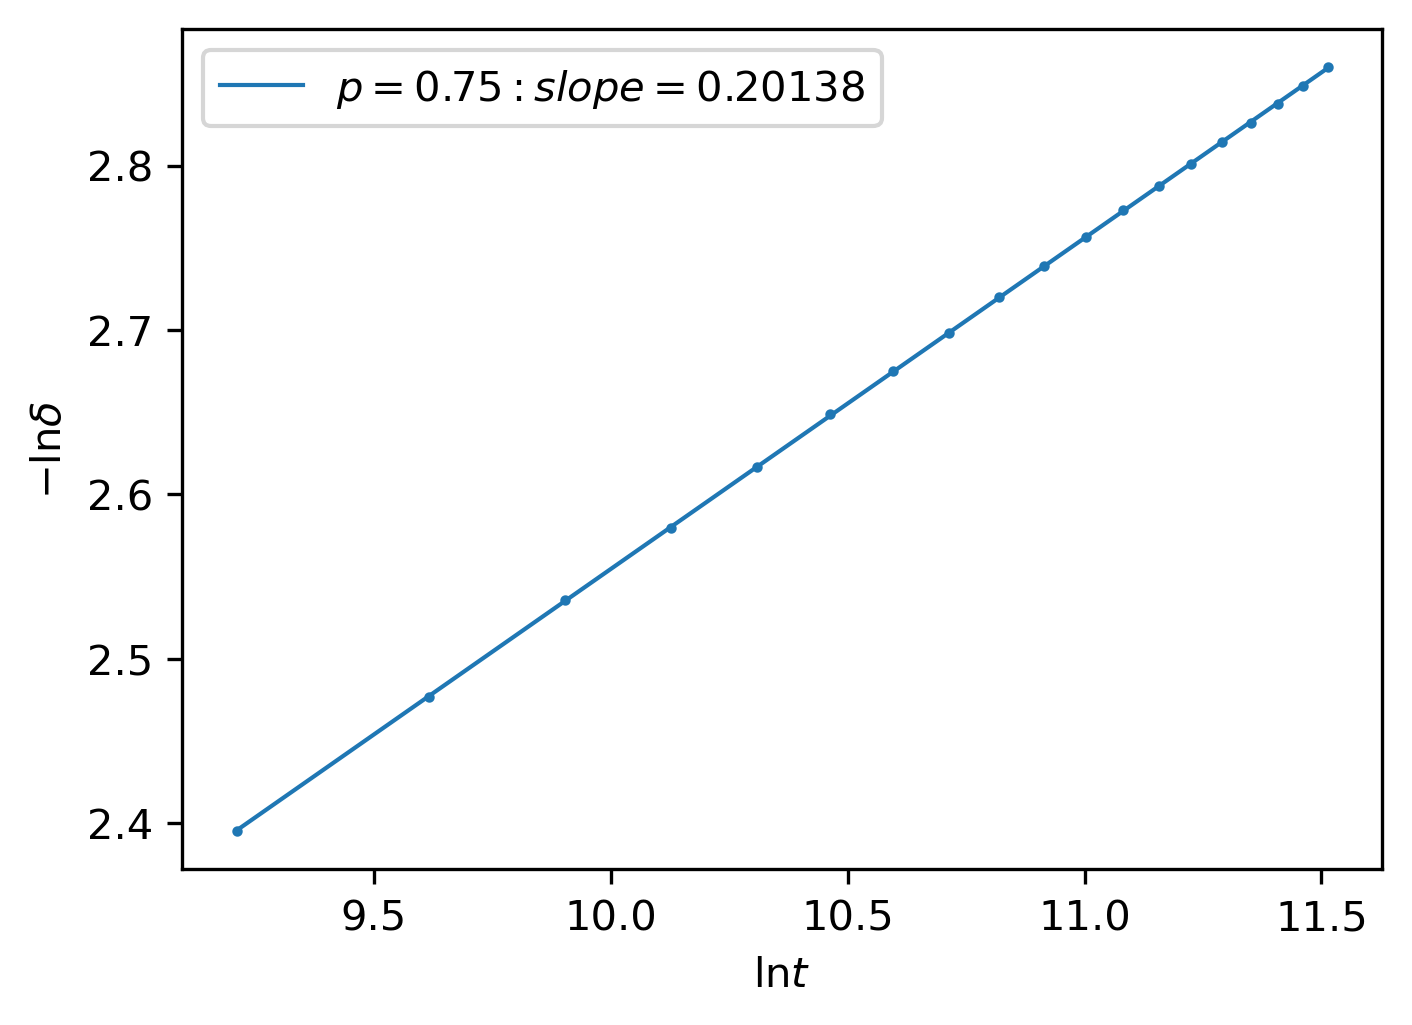

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']

i = 0

t = np.arange(min_iteration, time_iteration+1, iteration_step)

log_t = np.log(t)

regress = stats.linregress(log_t, minus_delta1_log)
plt.plot(log_t, minus_delta1_log, 'o', color=colors[i], markersize=1.5)
yyyyy = log_t*regress[0] + regress[1]
plt.plot(log_t, yyyyy, label=r"$p={:.2f}: slope={:.5f}$".format(probp, regress[0]),  color=colors[i], linewidth=1)
i += 1

# plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.legend(loc=2)
plt.ylabel(r"$-\ln \delta$")
plt.xlabel(r"$\ln t$")
# plt.ylim([0.5, 3])
ax.set_position([0.15, 0.15, 0.8, 0.8])
# print(fig_filename)
# plt.savefig(fig_filename
print(regress[0])

In [ ]:
N1_average.shape

In [ ]:
N1_average

In [18]:
M1_average

array([0.38803979, 0.37653253, 0.36879224, 0.3628475 , 0.35803695,
       0.35398417, 0.35042595, 0.34734646, 0.34457634, 0.34219887,
       0.33998225, 0.33807849, 0.336212  , 0.33442269, 0.33279203,
       0.33130658, 0.32991805, 0.32864114, 0.32742283])

### Write data to file

In [19]:
header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size']=ensemble_size
header['total_time_iteraion']=time_iteration
header['min_time_iteraion']=min_iteration
header['cols'] = ["t", "N", "M"]

time_col = np.arange(min_iteration, time_iteration+1, iteration_step)

header_str = json.dumps(header)
print(header_str)
print(out_data_filename)
# np.savetxt(out_data_filename, np.c_[time_col, N1_average, M1_average], header=header_str)

{"alpha": 2, "probability": 0.75, "ensemble_size": 10000, "total_time_iteraion": 1000000, "min_time_iteraion": 100000, "cols": ["t", "N", "M"]}
../../data/temp/alpha2/fractal_dim_alpha_2_p_75


### plot $-\ln \delta$ vs $\ln t$

In [20]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

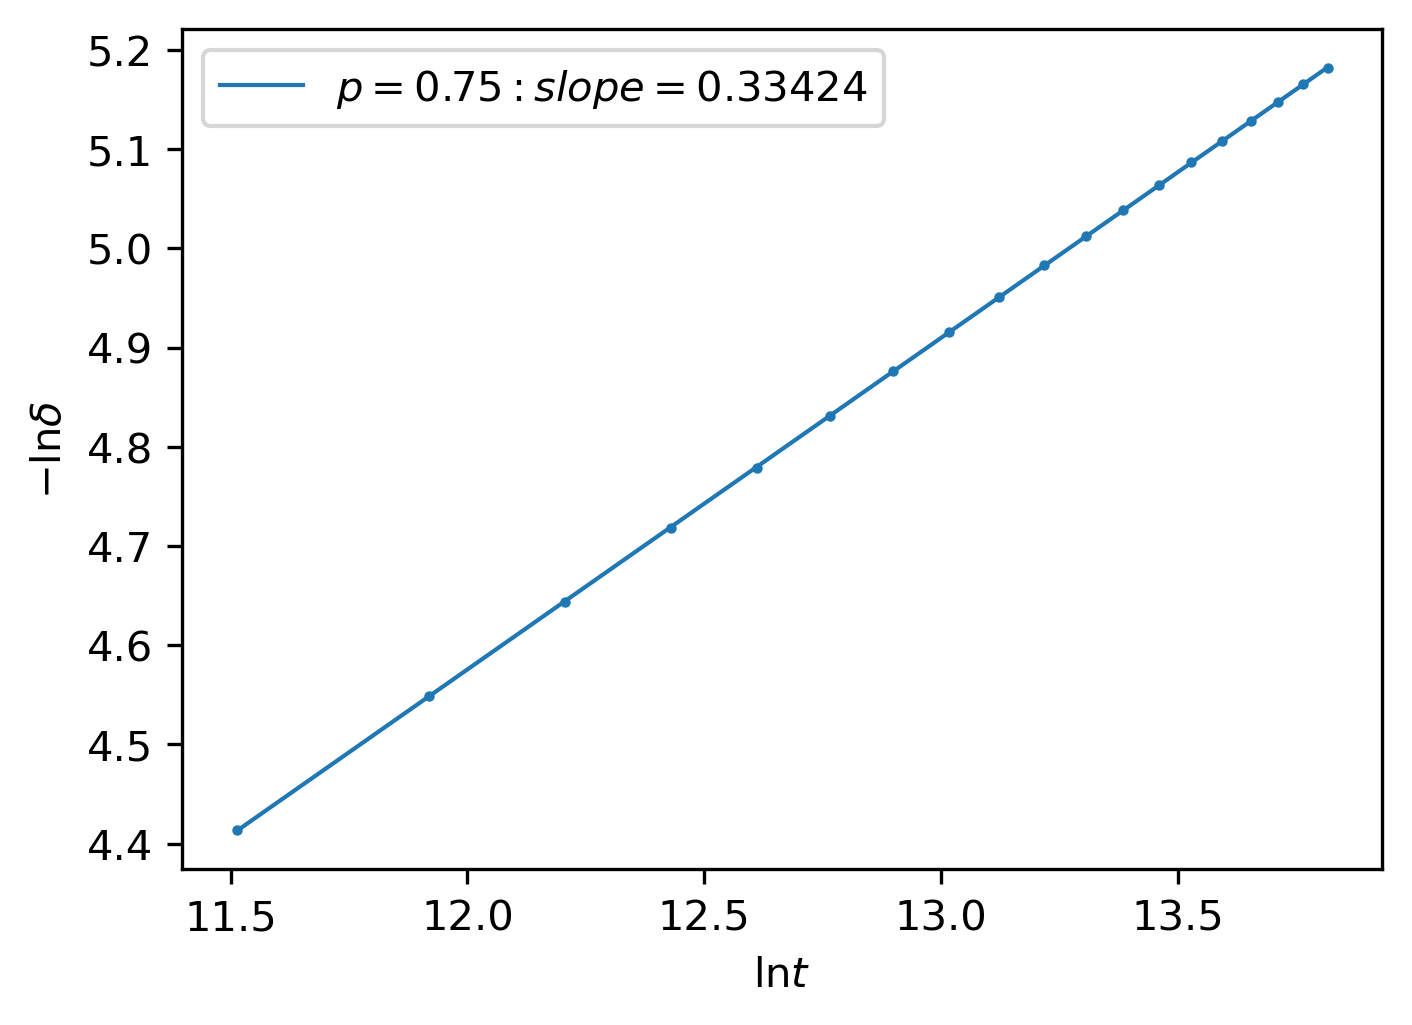

In [22]:
tt.shape

(19,)